# Navigation

You are welcome to use this coding environment to train your agent for the project. Follow the instructions below to get started!
Start the Environment Run the next code cell to install a few packages. This line will take a few minutes to run!

# Importing the Libraries

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")

# Creating the Environment

In [2]:
env = UnityEnvironment(file_name="D:/Udacity Nano Degree/Project 1/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# Brain

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# State and action spaces

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


# Training the agent

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
from dqn_agent import Agent
agent1 = Agent(state_size=37, action_size=4, seed=0)

env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

scores = [] # Empty List to store the scores
eps = 1 # Completely exploration (100% ) at beggining
epsdecay = 0.995 # epsillon decay to exploit as the timesteps increase (0.1%)
epsmin = 0.05 # Minimum Exploration rate (5%)

episode = 0 # Number of episodes
maxTsteps = 500 # Maximum Time steps
average = 0 # Average score (13 as our project goal)

while average < 13:
    while True:
        action = agent1.act(state, max(eps,epsmin)) # We get an Action from our AGENT
        env_info = env.step(int(action))[brain_name] # We pass the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent1.step(state, action, reward, next_state, done) # Stroring the transition
        state = next_state 
        score += reward # Accumulating the reward
        if done: 
            env_info = env.reset(train_mode=True)[brain_name]
            state = env_info.vector_observations[0]
            break
    eps = eps * epsdecay
    episode+=1
    scores.append(score) # Appending scores into list
    a = len(scores)
    score = 0
    average = sum(scores[a-min(100,a):a])/(min(100,a)) # Taking average of last 100 scores
    if(episode%100 == 0):
        print("Episode :", episode, "Average Score :", average)
        
print("The number of Episodes taken to achieve the TARGET is", episode)

Episode : 100 Average Score : 0.8
Episode : 200 Average Score : 3.98
Episode : 300 Average Score : 7.61
Episode : 400 Average Score : 10.59
Episode : 500 Average Score : 12.93
The number of Episodes taken to achieve the TARGET is 504


In [7]:
env.close()

# Results

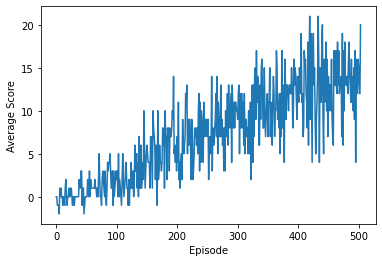

In [10]:
import matplotlib.pyplot as plt
plt.ylabel('Average Score')
plt.xlabel('Episode')
plt.plot(scores)

In [11]:
print("Epsillon at the end of Training",eps)

Epsillon at the end of Training 0.07995261925574046


# Saving the Model

In [87]:
torch.save(agent1.qnetwork_local.state_dict(), 'checkpoint.pth')

# Loading the saved model and Testing it

In [133]:
# load the weights from file
from dqn_agent import Agent
agent1 = Agent(state_size=37, action_size=4, seed=0)
agent1.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
scores = []
# Test it for 10 times and take the average:
for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]
    score = 0
    reward = 0
    while True:
        action = agent1.act(state, 0) # We get an Action from our AGENT Epsillon 0 to take all greedy actions
        env_info = env.step(int(action))[brain_name] # We pass the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        state = next_state # we make the current state as next state
        done = env_info.local_done[0]  
        reward = env_info.rewards[0]   
        score += reward
        if done:
            break
    scores.append(score)
    
print(np.mean(scores))

17.0
